# Programming Exercise Week 10: Introduction to `networkx`

<font color='blue'><b>Goals of this notebook:</b></font> Create and draw undirected graphs using `networkx`.

<font color='blue'><b>Python packages required:</b></font>
`networkx`

<font color='blue'><b>Additional resources:</b></font> 
- For more on NetworkX including examples and tutorials, see https://networkx.github.io/documentation/stable/.
- For more on graph drawing, see https://networkx.github.io/documentation/stable/reference/drawing.html.
- For a list of algorithms supported by `networkx`, see https://networkx.github.io/documentation/stable/reference/algorithms/index.html.

<font color='blue'><b>Your tasks:</b></font> 
- Task 1: Finding triangles in a graph
- Task 2: Representing the relationship between friends

## Part 1: Creating Graphs

Graphs are ways of representing relationships between objects. A graph consists of two components: a set of nodes (also known as vertices) and a set of edges that connect the nodes. 

We can build graphs in Python in three steps:
1. <b>Import Python's toolbox for graphs.</b> This toolbox is called `networkx`. 
2. <b>Create an empty graph.</b> An empty graph is a graph containing no nodes or edges.
3. <b>Add nodes and edges.</b>

Let's use the the following example to demonstrate <b>Steps 1-3</b>.

$$
\begin{array}{rcl}
\text{Nodes} &=& \{1, 2, \dotsc, 7\}\\
\text{Edges} &=&\{\{i,j\} : ~~ |i - j| \equiv 1\pmod{5} ~~\text{or} ~~ |i - j| \equiv 2\pmod{5}\}.
\end{array}
$$

_Note:_ We can label each node with anything we like, e.g., a number, a letter, or a name.

### Step 1: Loading NetworkX

The first step is to load `networkx` using the command below.

In [1]:
# Load networkx
import networkx as nx

### Step 2: Creating an empty graph

After loading `networkx`, we can create an empty graph named `G` using the line of code below. Feel free to replace `G` with the name that you want for your graph.

In [2]:
# Create an empty graph
G = nx.Graph()

### Step 3: Adding nodes and edges 
#### Adding nodes

There are many ways to add nodes to `G`.
We add the node labeled `v` to `G` using the command `G.add_node(v)`.
We can view the nodes of `G` using the command `G.nodes`.
Run the following to add node labeled `1` and print the node list. 

In [3]:
# Add one node to G
G.add_node(1)

# Print the node list
print(f'The nodes of G are {G.nodes}.')

The nodes of G are [1].


We can add multiple nodes using the command `G.add_nodes_from()`.
If we want to add nodes `2,3,4,5` to `G`, then we can use the command `G.add_nodes_from([2,3,4,5])`. 

Here, the input to the function `[2,3,4,5]` is a Python list. Since `[2,3,4,5]` is equivalent to `range(2,6)`, the command `G.add_nodes_from(range(2,6))` will yield the same results.

In [4]:
# Add multiple nodes to G
G.add_nodes_from([2,3,4,5])

# Print the nodes
print(f'The nodes of G are {G.nodes}.')

The nodes of G are [1, 2, 3, 4, 5].


A third way to add a node is to add an edge containing the node. Notice that the last two nodes that we need to add, `6` and `7`, form an edge in `G`. We will add these two nodes by adding an edge as described in the section below.

#### Adding edges
We can add one edge at a time using the command `G.add_edge()` with the two nodes of the edge inserted in the bracket. Therefore, the command `G.add_edge(6,7)` will add the nodes `6` and `7` <i>and</i> add the edge `(6,7)`.

We can access the current edge list using the command `G.edges`.

In [5]:
# Add nodes to G by adding an edge
G.add_edge(6,7)

# Print the nodes
print(f'The nodes of G are {G.nodes}.')

# Print the edges
print(f'The edges of G are {G.edges}.')

The nodes of G are [1, 2, 3, 4, 5, 6, 7].
The edges of G are [(6, 7)].


We can also add multiple edges at once using the command `G.add_edges_from()` with the edges inserted in `()` in a list. For example, the command `G.add_edges_from([(1,2), (2,3), (3,4), (4,5)])` will add the edges `(1,2), (2,3), (3,4)` and `(4,5)` to `G`.

In [6]:
# Add multiple edges
G.add_edges_from([(1,2), (2,3), (3,4), (4,5)])

# Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(1, 2), (2, 3), (3, 4), (4, 5), (6, 7)].


#### Removing nodes and edges
It is important to know that we can also remove nodes and edges from a graph. The commands to remove a node and an edge from `G` are `G.remove_node()` and `G.remove_edge()` respectively. For example, the command `G.remove_edge(1, 2)` removes the edge `(1,2)` from `G`.

We can also use the commands `G.remove_nodes_from()` and `G.remove_edges_from()`, where the input in the bracket is a list of nodes or edges.

The code below demonstrates how to remove the edge `(1, 2)` from `G`.

In [7]:
# Removing the edge (1, 2) from G
G.remove_edge(1, 2)

#Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(2, 3), (3, 4), (4, 5), (6, 7)].


#### Iterating through all nodes and edges

We can add the remaining edges of `G` by looping through all nodes and checking if they form an edge of `G`. We can loop through the nodes of `G` using `for i in G.nodes`.

In [8]:
# Create the remaining edges of G
for i in G.nodes:
    for j in G.nodes:
        if abs(i-j) % 5 == 1 or abs(i-j) % 5 == 2 :
            G.add_edge(i,j)
            
# Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(1, 2), (1, 3), (1, 7), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)].


_Note:_ The Python package `itertools` allows us to quickly loop over tuples of a set.
As an example, the double loop above could be replaced by

    from itertools import combinations

    for pair in combinations(G.nodes,2):
        if abs(pair[0]-pair[1]) % 5 == 1 or abs(pair[0]-pair[1]) % 5 == 2:
            G.add_edge(pair[0], pair[1])

The previous code loops through all `combinations` of `G.nodes` of size `2`. 

Congratulations! You have succesfully created a graph using `networkx`. 

We can now examine the nodes and edges of `G`. Your first task below is to search for triangles in `G`.

### Task 1: Finding triangles in a graph

A triangle in a graph is three nodes that are all connected by an edge.
One way to check if `G` has a triangle is to check every triple of nodes and see if they are adjacent.

The command `(i,j) in G.edges` returns `True` if `(i,j)` is an edge of `G`.

**Your task:** check if `G` contains a triangle and print any triangles found.

In [9]:
# Your code for finding triangles in G



## Part 2: Drawing graphs

It is often helpful for us to visualize a graph. The `networkx` package can be used to plot graphs, although sometimes it is not easy to draw a graph in `networkx` precisely how we want. 

We can draw `G` using the command `nx.draw(G, with_labels=True, node_color='lightblue')`. There is one mandatory input and many optinonal inputs to this function.

- `G` : This is the name of the graph that we want to draw. It is mandatory.

- `with_labels = True` : This shows the labels of our nodes. This is an optional input. If we have many nodes, then maybe it is cleaner to remove this input to remove all labels.

- `node_color = 'lightblue'`: This adjusts the color of the nodes.

_Note_: If you encounter the error `NetworkXError: random_state_index is incorrect` after running the following code, it could be caused by a wrong version of the `decorator` module. Try updating this module to the latest version by using the command `!pip install --upgrade decorator` and then restarting the kernel of this notebook.

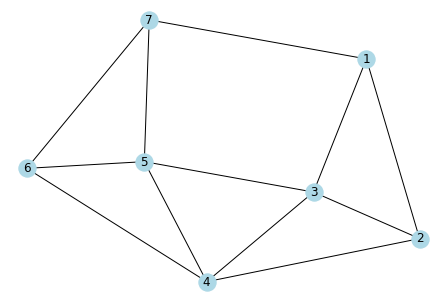

In [10]:
# This magic command is for drawing inline in the Jupyter Notebook. 
# It needs to be executed only once for the full notebook.
%matplotlib inline

# Draw G
nx.draw(G, with_labels=True, node_color='lightblue')

# Note: There might be a deprecation warning appearing; it comes from code in the
#    networkx package, so we cannot do much about it.

One very useful optional input is the position of the nodes. If we do not specify the position, then `nx.draw()` will draw the nodes in different places everytime we run it! You can test this yourself by re-running the previous command.
 
It is useful to fix the positions because we can later use these positions to draw variations of our original graph. These positions can be created manually, but `networkx` has a collection of positions to choose from. The code `node_pos =  nx.circular_layout(G)` chooses the `circular_layout` positioning. We add this positioning to our nodes by adding `pos = node_pos` as an input to the `nx.draw()` command. 

_Note:_ Some layouts in `networkx` create new positions every time when it is run. Therefore, you should only run these command once and reference the position later using `node_pos`.
In this way, it is guaranteed that every time you draw `G`, the nodes will be in the same position.

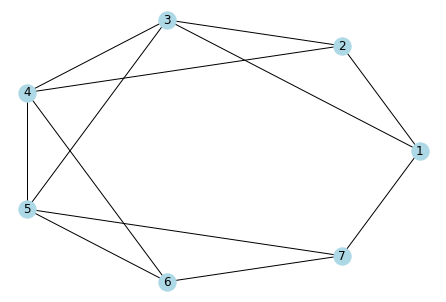

In [11]:
# Fix the position of the nodes
node_pos = nx.circular_layout(G)

# Draw G with fixed positions
nx.draw(G, with_labels=True, pos=node_pos, node_color='lightblue')

Good job!
At this point, we have seen how to create undirected graphs and draw them.
It turns out that we can already run many common graph algorithms with these commands. 

### Example: Matchings

A *matching* is a set of edges of `G` such that no two edges share a node. Out of all matchings in `G`, a *maximum matching* is a matching with the largest number of edges.

We can find a maximum matching in a graph using `M = nx.max_weight_matching(G)`. This command returns a set of edges `M` in the maximum matching.

In [12]:
# Find a maximum matching in G
M = nx.max_weight_matching(G)

print(f'A maximum matching in G is {M}.')

A maximum matching in G is {(2, 3), (6, 7), (4, 5)}.


We can draw `G` with only the edges of `M` by specifying the optional argument `edgelist = M` in the `nx.draw()` command. Note that we use the same node positions as before so that it is easier to compare the graph below with the original one.

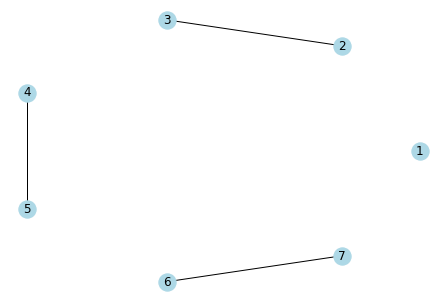

In [13]:
# Draw G with the edges of M
nx.draw(G, pos = node_pos , edgelist = M, 
              with_labels=True, node_color = 'lightblue')

## Part 3: Labelling graphs

In the last section, we introduce how to add labels and attributes to graphs in `networkx`.

### Labeling nodes and adding attributes

- To add a node with an attribute and a label to `G`, we can use the command `G.add_node(node_label, attribute_name = attribute_value)`.

- To add many nodes at once, we can continue using the command `G.add_node_from()` with a slight modification to include their attributes:

> `  G.add_nodes_from(
       [(node1, {"attr1_name": attr1_value1, "attr2_name": attr2_value1, ...}), 
        (node2, {"attr1_name": attr1_value2, ...}),...])`

- To view a node's attribute, we can using the command `G.nodes[node_label]["attribute_name"]`.

- To access all of the attributes, we can use `nx.get_node_attributes(G,"attribute_name")`.

### Labeling edges and adding attributes

Adding edge attributes are done in the same way as node attributes except we use the commands `G.add_edge()` and `G.add_edges_from()`.

- To add a single edge with attribute, we can use `G.add_edge("Node1_label", "Node2_label", attribute_name = attribute_value)`.

- To add multiple edges with attributes, we can use

> `G.add_edges_from([("Node1_label", "Node2_label", {"attr_name": attr_value}) , 
                   ("Node1_label", "Node3_label", {"attr_name": attr_value})])`

- To access an edge attribute, we can use the command  `nx.get_edge_attributes(G,"attribute_name")`.

- To change a value of an edge-attribute, we can use the following command:

> `G.edges[("Node1_label","Node2_label")]["attribute_name"] = new_attribute_value`

### Example: Travel time between Zurich, Bern and Geneva

As an example we use the the cities Zurich, Bern and Geneva as nodes and for the edge attributes we use the time it takes to get from one city to the other using the train:

Bern has 0.133 million people.
Geneva has 0.198 million people.
Zurich has 0.415 million people.
The travel times are {('Bern', 'Zurich'): 56, ('Bern', 'Geneva'): 116, ('Geneva', 'Zurich'): 164}.
The new travel times are {('Bern', 'Zurich'): 78, ('Bern', 'Geneva'): 116, ('Geneva', 'Zurich'): 164}.


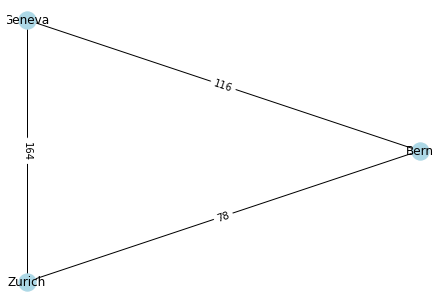

In [14]:
# Create an empty graph
G = nx.Graph()

# Add the nodes
G.add_nodes_from([("Bern", {"population" : 0.133}),
                  ("Geneva", {"population" : 0.198}),
                  ("Zurich", {"population" : 0.415})])

# Print each city's population individually
for city in G.nodes:
    print(f'{city} has {G.nodes[city]["population"]} million people.')

# Add the edges
G.add_edges_from([("Bern", "Zurich", {"travel_time": 56}),
                  ("Bern", "Geneva", {"travel_time": 116}),
                  ("Geneva", "Zurich", {"travel_time": 164})])

# Print the edge travel times
times = nx.get_edge_attributes(G, "travel_time")
print(f'The travel times are {times}.')

# Update travel time from Bern to Zurich
G.edges[("Bern","Zurich")]["travel_time"] = 78

# Print the new edge travel times
times = nx.get_edge_attributes(G, "travel_time")
print(f'The new travel times are {times}.')

# Draw the weighted graph
# This command brings the nodes in a circle, which makes it easier to look at
node_pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=node_pos, node_color = 'lightblue')
edge_draw = nx.draw_networkx_edge_labels(G, pos = node_pos, 
                                         edge_labels = nx.get_edge_attributes(G, 'travel_time'))

### Task 2: Representing the relationship between friends

Recall the following exercise from Problem Set 9: Imagine you want to see a movie at the cinema with friends. You reserved a row with exactly as many seats as needed to fit you and your friends. You get along with all of your friends. However, some of your friends do not get along. You want to find a suitable seating arrangement such that everyone gets a seat and no one sits next to someone they do not get along with.
        
Suppose that the list of people each person gets along with is as follows (note that some people have no friends other than you):

| Your friend | Who they get along with    |
|:-----------:|:---------------------------|
|Brian        | -                          |
|Carol        | Daniel, Linda, Nancy       |
|Daniel       | Carol, Linda               |
|Helen        | -                          |
|Linda        | Carol, Daniel, Mark, Nancy |
|Mark         | Linda, Nancy               |
|Nancy        | Carol, Linda, Mark, Steven |
|Steven       | Nancy                      |

Can you represent the relationships between your friends in a graph using `networkx`?

In [15]:
# Your code to draw the graph



Imagine that Brian and Steven suddenly start getting along. Can you update the graph?

In [16]:
# Your code to update the graph

